
<div class="note">
    <p style="margin-top: 0; margin-bottom: 0;">
        <img style="margin-top: 0; margin-bottom: 0; height: 2em;" class="inline-block mr-2 no-fancybox"
            src="https://upload.wikimedia.org/wikipedia/commons/3/38/Jupyter_logo.svg" alt="">
        This page is based on a Jupyter notebook.
<a href="./great_cell_LIE.ipynb" download="great_cell_LIE.ipynb"><img class="no-fancybox" style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;" src="https://img.shields.io/static/v1?label=Download:&message=great_cell_LIE.ipynb&color=blue" /></a>
<a href="https://gitlab.opengeosys.org/bilke/ogs/-/blob/web-versioning/Tests/Data/LIE/HydroMechanics/GreatCellWithBBar/great_cell_LIE.py"><img src="https://img.shields.io/static/v1?label=Source:&message=great_cell_LIE.py&color=brightgreen" class="no-fancybox"
        style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;" /></a>
<a href="https://binder.opengeosys.org/v2/gh/bilke/binder-ogs-requirements/6.5.6-0.7.0?urlpath=git-pull%3Frepo=https://gitlab.opengeosys.org/ogs/ogs%26urlpath=lab/tree/ogs/Tests/Data/LIE/HydroMechanics/GreatCellWithBBar/great_cell_LIE.py%26branch=6.5.6%26depth=1">
    <img class="no-fancybox" style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;"
        src="https://img.shields.io/static/v1?label=&message=Launch notebook&color=5c5c5c&logo=" />
</a></p></div>

## A 2D GREAT cell experiment benchmark simulated using the LIE and the B-bar methods

This benchmark is based on the SAFENET task of the DECOVALEX 2027 project, which aims to better understand fracture nucleation and evolution processes in crystalline rocks with applications in nuclear waste management and geothermal reservoir engineering, and it simulates a 2D ideal model of  the GREAT Cell experiment [1][2].

More details regarding boundary condition and order of PEEs can be found in [the GREAT Cell experiment description](https://www.opengeosys.org/docs/benchmarks/hydro-mechanics/greatcellhm/).


The load conditions or the pressure applied on the segment `PEE`s are given in the table below:
| Marker | PEE1 Angle to $\sigma_2$ | PEE1 & 1a | PEE2 & 2a | PEE3 & 3a | PEE4 & 4a | PEE5 & 5a | PEE6 & 6a | PEE7 & 7a | PEE8 & 8a |
|--------|--------------------------|----------|----------|----------|----------|----------|----------|----------|----------|
| F      | 67.5°                    | 3.82     | 7.80     | 9.95     | 10.0     | 6.64     | 4.46     | 1.17     | 1.0      |


The load condition of each `DSS` is the average of the values of its two PEE neighbours. Rigid movement is avoided by fixing the displacement at the bottom point.

An existing fracture is assumed along the $x$ axis.

The material properties of the sample are given in the following table:
### Greywacke Properties

| Parameter                     | Value          | Unit          |
|-------------------------------|----------------|---------------|
| Young's modulus               | 26.87e9        | Pa            |
| Poisson's ratio               | 0.27           | –             |
| Biot coefficient              | 0.8            | –             |
| Porosity                      | 0.005          | –             |
| Permeability                  | 2.58e-19       | m²            |
| Solid density                 | 2650           | kg/m³         |
| Normal stiffness              | 100e9          | Pa/m          |
| Tangential stiffness          | 50e9           | Pa/m          |
| Fluid compressibility (c_f)   | 4.4e-10        | Pa⁻¹          |
| Solid bulk modulus (k_s)      | 1.95e10        | Pa            |
| Initial fracture width (w_init)| 1e-6          | m             |

### Fluid Properties

| Parameter               | Value      | Unit     |
|-------------------------|------------|----------|
| Density                 | 1000.0     | kg/m³    |
| Viscosity               | 1e-3       | Pa·s     |
| Injection flow rate     | 4.167e-7   | m³/s     |
| Outlet pressure         | 3.45e6     | Pa       |

### Rubber Sheath Properties

| Parameter        | Value   | Unit     |
|------------------|---------|----------|
| Young's modulus  | 0.1e9   | Pa       |
| Poisson's ratio  | 0.4     | –        |
| Porosity         | 0.001   | –        |
| Permeability     | 1e-17   | m²       |
| Density          | 1500    | kg/m³    |
| Biot coefficient | 0.0     | –        |


The initial stresses in in the fracture are $\sigma_{nn}=0$ MPa and $\sigma_{tt}=-2$ MPa.

This benchmark uses the LIE and the B-bar methods.

## Reference

1. McDermott, C.I., Fraser-Harris, A., Sauter, M., Couples, G.D., Edlmann, K., Kolditz, O., Lightbody, A., Somerville, J. and Wang, W., 2018. New experimental equipment recreating geo-reservoir conditions in large, fractured, porous samples to investigate coupled thermal, hydraulic and polyaxial stress processes. *Scientific reports*, 8(1), p.14549.

2. Mollaali, M., Kolditz, O., Hu, M., Park, C.H., Park, J.W., McDermott, C.I., Chittenden, N., Bond, A., Yoon, J.S., Zhou, J. and Pan, P.Z., Liu H., Hou W.,  Lei H., Zhang L., Nagel T., Barsch M., Wang W., Nguyen S., Kwon S. and Yoshioka K., 2023. Comparative verification of hydro-mechanical fracture behavior: Task G of international research project DECOVALEX–2023. *International Journal of Rock Mechanics and Mining Sciences*, 170, p.105530.

In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import ogstools as ot

ot.plot.setup.show_region_bounds = False

out_dir = Path(os.environ.get("OGS_TESTRUNNER_OUT_DIR", "_out"))
out_dir.mkdir(parents=True, exist_ok=True)

## Run the model with and without the B-bar method

In [2]:
project_file = Path("HM2b_LIE_F.prj")
mesh_path = Path("mesh_GreatCell_embeddedFracture").resolve()

for b_bar in ["false", "true"]:
    prj = ot.Project(
        input_file=project_file, output_file=Path(out_dir, f"b-bar_{b_bar}.prj")
    )
    prj.replace_text("hm_lie_bbar_" + b_bar, xpath="./time_loop/output/prefix")
    prj.replace_text(b_bar, xpath="./processes/process/use_b_bar")
    prj.write_input()
    prj.run_model(logfile=Path(out_dir, "out.txt"), args=f"-o {out_dir} -m {mesh_path}")

Project file written to output.
Simulation: /var/lib/gitlab-runner/builds/vZ6vnZiU/0/ogs/build/release-all/Tests/Data/LIE/HydroMechanics/GreatCellWithBBar/great_cell_LIE/b-bar_false.prj
Status: finished successfully.
Execution took 34.55061626434326 s


Project file written to output.
Simulation: /var/lib/gitlab-runner/builds/vZ6vnZiU/0/ogs/build/release-all/Tests/Data/LIE/HydroMechanics/GreatCellWithBBar/great_cell_LIE/b-bar_true.prj
Status: finished successfully.
Execution took 34.845014572143555 s


## Compare the volume strains obtained with and without the B-bar method

The figure below shows that the B-bar method improves the strain result significantly.

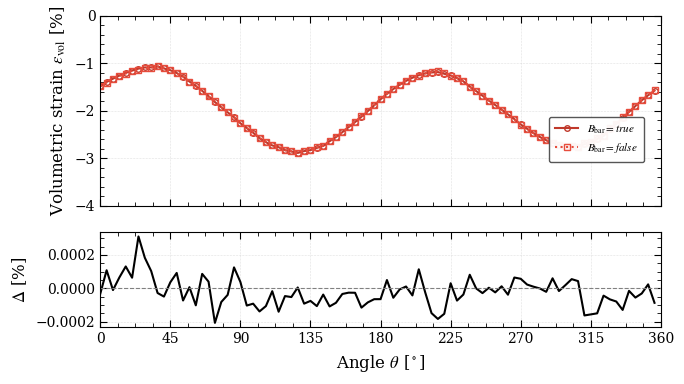

In [3]:
def inner_mesh(filename: str) -> ot.Mesh:
    "Return submesh inside a radius of 0.065."
    mesh = ot.MeshSeries(Path(out_dir, filename))[-1]
    radii = np.asarray([np.linalg.norm(cell.center) for cell in mesh.cell])
    return ot.Mesh(mesh.extract_cells(radii < 0.065))


plt.rcParams.update(
    {
        "font.family": "serif",
        "font.serif": ["DejaVu Serif"],
        "font.size": 12,
        "axes.labelsize": 12,
        "axes.titlesize": 14,
        "legend.fontsize": 8,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        "lines.linewidth": 1.5,
        "axes.linewidth": 0.8,
        "grid.linewidth": 0.4,
        "savefig.dpi": 600,
        "mathtext.fontset": "stix",
    }
)


def sorted_angles_eps_trace(filename: str) -> tuple[np.ndarray, np.ndarray]:
    edge = inner_mesh(filename).extract_feature_edges()
    eps_trace = ot.variables.strain.trace.transform(edge)
    phi = np.arctan2(edge.points[:, 1], edge.points[:, 0]) * 180 / np.pi
    phi[phi < 0] += 360
    sort_idx = np.argsort(phi)
    return (phi[sort_idx], eps_trace[sort_idx])


fig, (ax, ax_err) = plt.subplots(
    2, 1, figsize=(7.0, 4.0), sharex=True, gridspec_kw={"height_ratios": [2, 1]}
)

series = {}
colors = {"true": "#c0392b", "false": "#e74c3c"}
for b_bar in ["true", "false"]:
    angles, eps_v = sorted_angles_eps_trace(f"hm_lie_bbar_{b_bar}.pvd")
    linestyle = {"false": "dotted", "true": "solid"}[b_bar]
    ax.plot(
        angles,
        np.array(eps_v) * 100,
        linestyle=linestyle,
        label=rf"$B_{{\mathrm{{bar}}}} = {b_bar}$",
        marker="o" if b_bar == "true" else "s",
        markersize=4,
        markerfacecolor="none",
        markeredgewidth=1.0,
        color=colors[b_bar],
    )
    series[b_bar] = (angles, eps_v)


ax.set_ylabel(r"Volumetric strain $\varepsilon_{\mathrm{vol}}$ [%]", labelpad=5)
ax.set_xlim(0, 360)
ax.set_ylim(-4, 0)
ax.set_xticks(np.arange(0, 361, 45))
ax.grid(True, which="major", linestyle=":", linewidth=0.4, alpha=0.7)

ax.legend(
    loc="lower right",
    bbox_to_anchor=(0.98, 0.2),
    frameon=True,
    framealpha=0.95,
    edgecolor="0.3",
    borderpad=0.6,
)

phi_t, y_t = series["true"]
phi_f, y_f = series["false"]
if not np.array_equal(phi_t, phi_f):
    y_f = np.interp(phi_t, phi_f, y_f)
err = y_t - y_f

ax_err.plot(phi_t, err, color="k")
ax_err.axhline(0, linestyle="--", linewidth=0.8, color="gray")
ax_err.set_xlabel(r"Angle $\theta$ [$^\circ$]", labelpad=5)
ax_err.set_ylabel(r"$\Delta$ [%]", labelpad=5)
ax_err.grid(True, which="major", linestyle=":", linewidth=0.4, alpha=0.7)

ax.minorticks_on()
ax.tick_params(which="minor", length=3, width=0.6)
ax.tick_params(which="major", length=5, width=0.8)
ax.tick_params(axis="both", which="both", direction="in", top=True, right=True)

ax_err.minorticks_on()
ax_err.tick_params(which="minor", length=3, width=0.6)
ax_err.tick_params(which="major", length=5, width=0.8)
ax_err.tick_params(axis="both", which="both", direction="in", top=True, right=True)

plt.tight_layout()
plt.savefig("hm_lie_bbar_comparison.pdf", dpi=600, bbox_inches="tight", pad_inches=0.05)
plt.show()
plt.close()

## Results over the entire domain

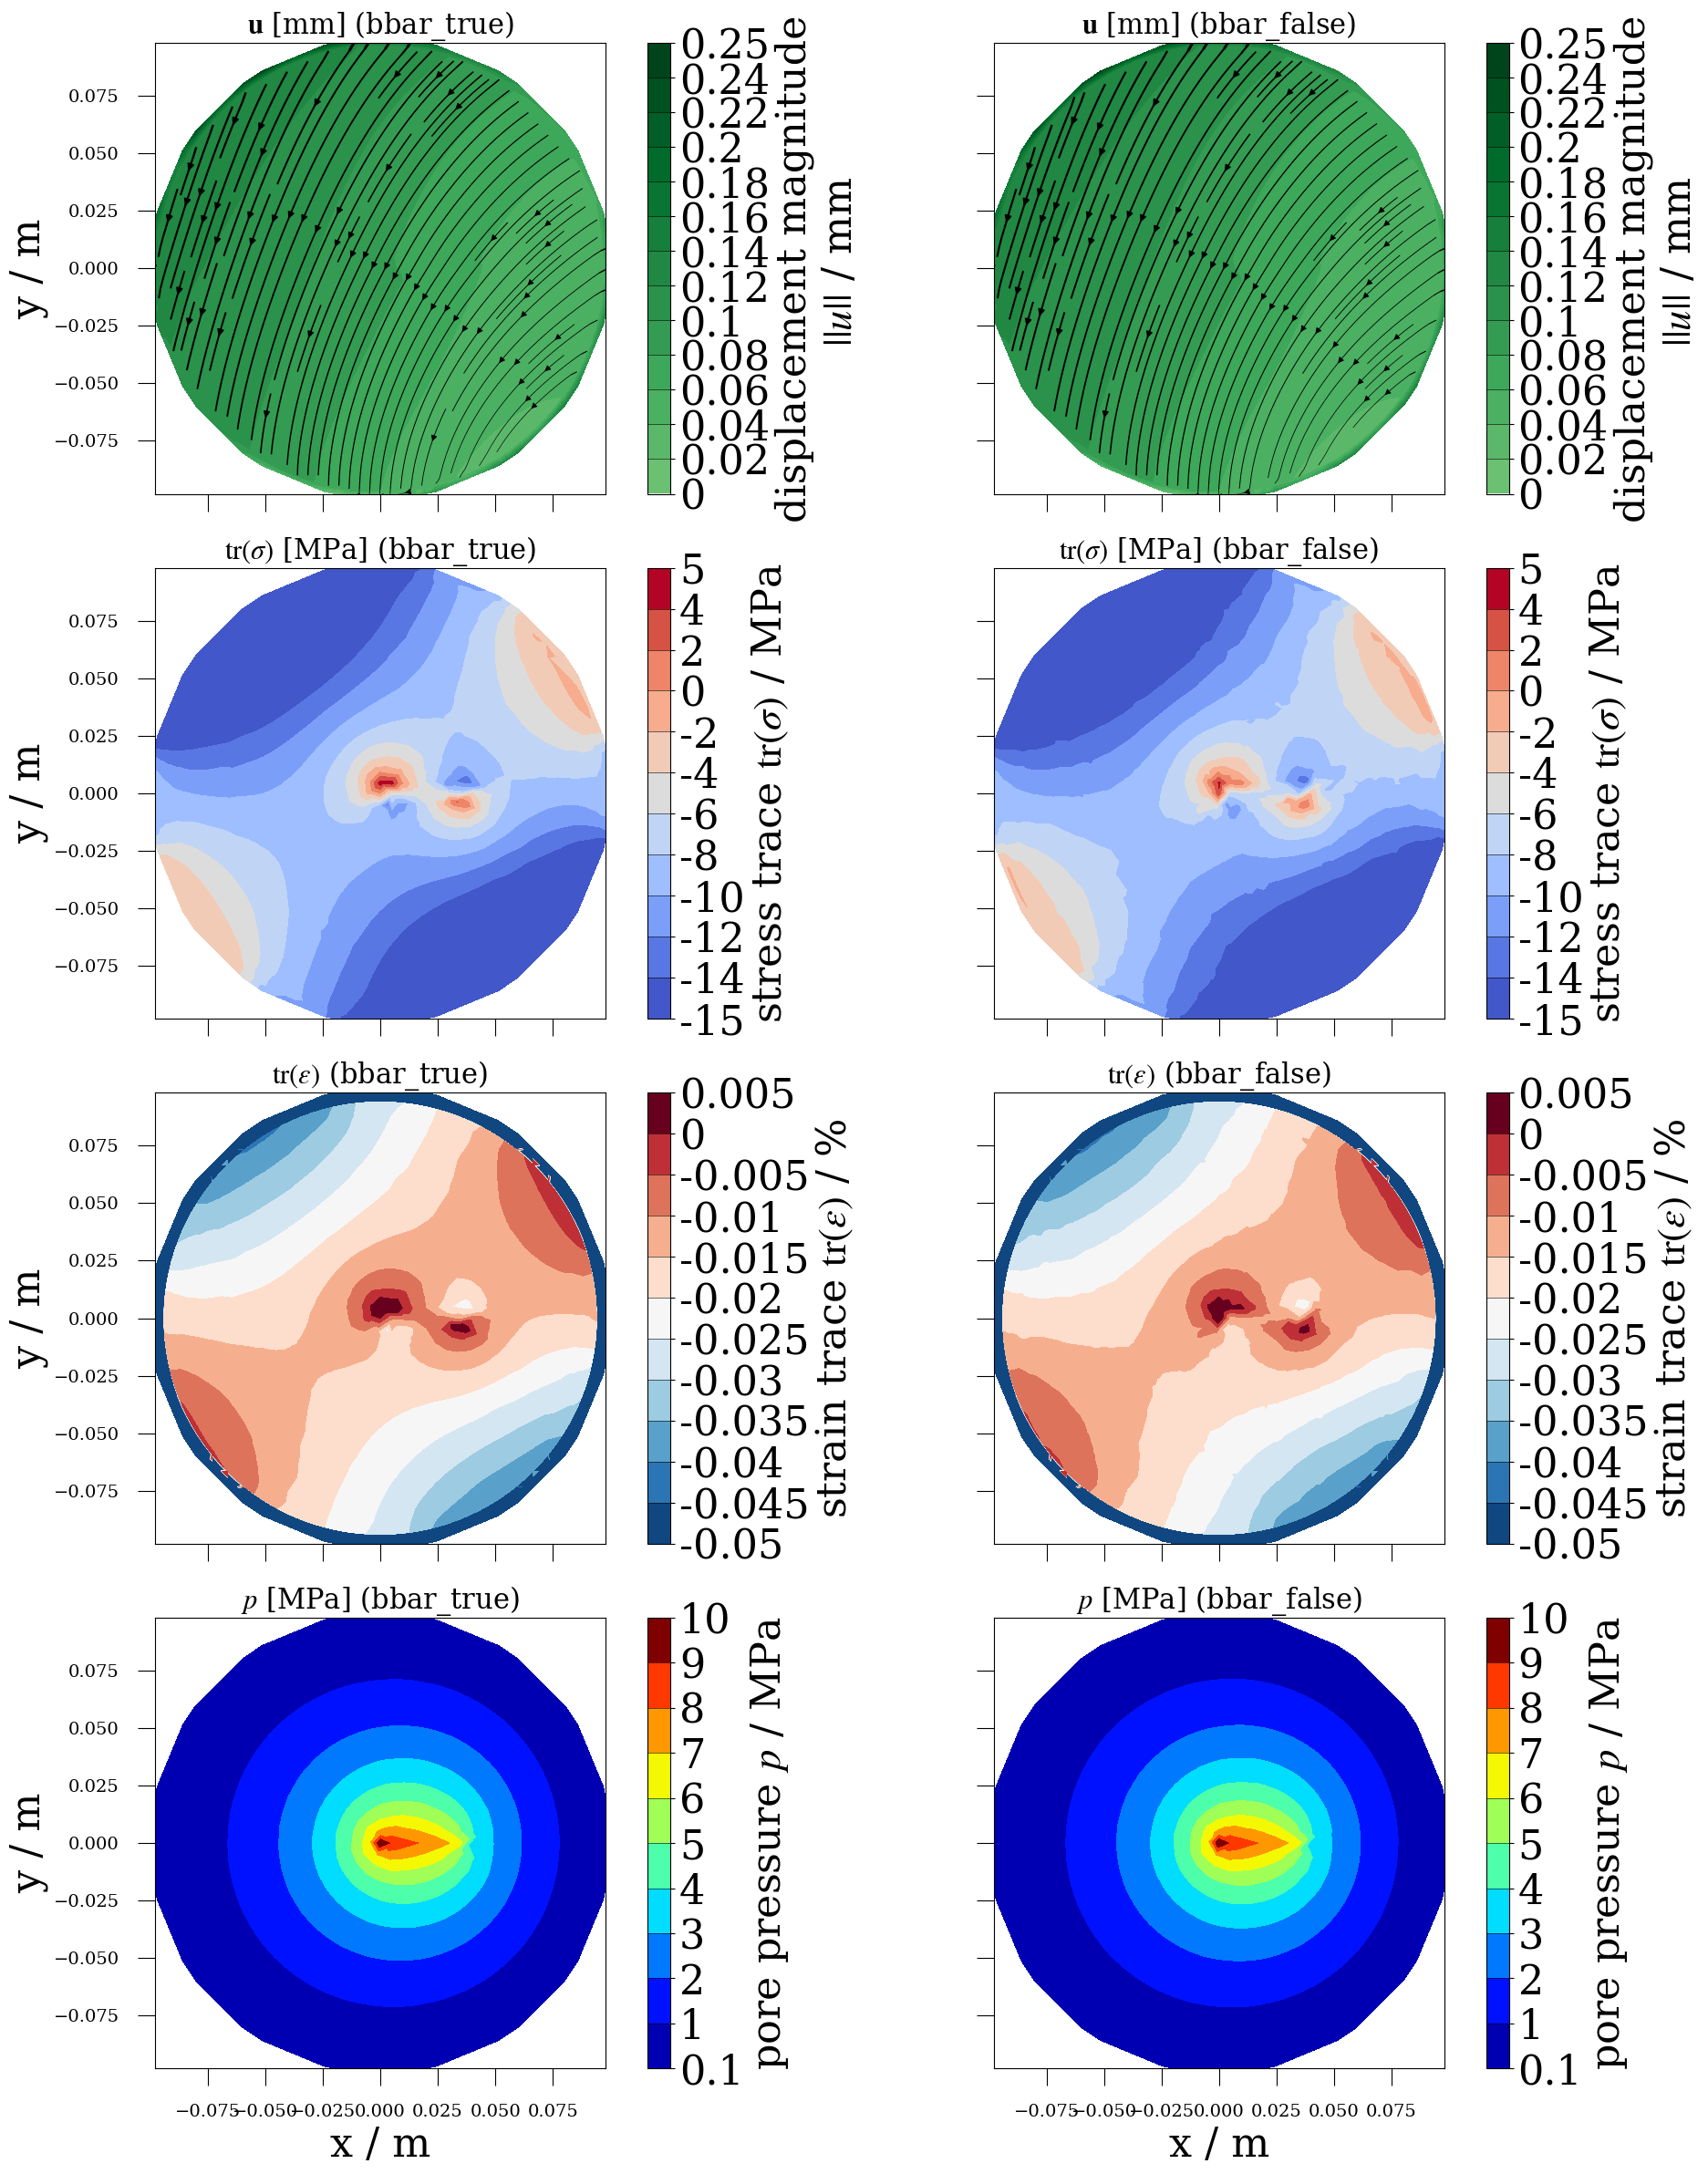

In [4]:
def plot_mesh_compare(
    file_true: Path,
    file_false: Path,
    colorbar_opts: dict,
    save_file: Path | None = None,
    domain_limit: float = 0.098,
):
    mesh_true = ot.MeshSeries(file_true)[-1]
    mesh_false = ot.MeshSeries(file_false)[-1]

    has_p_true = "pressure" in mesh_true.point_data
    has_p_false = "pressure" in mesh_false.point_data
    include_pressure = has_p_true and has_p_false

    rows = [
        (
            "$\\mathbf{u}$ [mm]",
            ot.variables.displacement.replace(output_unit="mm"),
            "u",
        ),
        ("$\\mathrm{tr}(\\sigma)$ [MPa]", ot.variables.stress.trace, "stress"),
        ("$\\mathrm{tr}(\\varepsilon)$", ot.variables.strain.trace, "strain"),
    ]
    if include_pressure:
        rows.append(("$p$ [MPa]", ot.variables.pressure, "pressure"))

    nrows = len(rows)
    ncols = 2
    figsize = (10 * ncols, 6 * nrows)
    fig, axs = plt.subplots(
        nrows=nrows, ncols=ncols, figsize=figsize, sharex=True, sharey=True
    )

    if nrows == 1:
        axs = np.array([axs])

    for i, (title, var, key) in enumerate(rows):
        mesh_true.plot_contourf(var, fig, axs[i, 0], **colorbar_opts[key])
        axs[i, 0].set_title(f"{title} (bbar_true)", fontsize=22)

        mesh_false.plot_contourf(var, fig, axs[i, 1], **colorbar_opts[key])
        axs[i, 1].set_title(f"{title} (bbar_false)", fontsize=22)

    for ax in axs.ravel():
        ax.set_aspect("equal")
        ax.tick_params(labelsize=14)
        ax.set_xlim(-domain_limit, domain_limit)
        ax.set_ylim(-domain_limit, domain_limit)

    fig.tight_layout()
    if save_file:
        Path(save_file).parent.mkdir(parents=True, exist_ok=True)
        fig.savefig(save_file, dpi=300, bbox_inches="tight")
    plt.show()
    plt.close(fig)


colorbar_opts = {
    "u": {"vmin": 0, "vmax": 0.25, "cmap": "Greens"},
    "stress": {"vmin": -15, "vmax": 5, "cmap": "coolwarm"},
    "strain": {"vmin": -0.05, "vmax": 0.005, "cmap": "RdBu_r"},
    "pressure": {"vmin": 0.1, "vmax": 10, "cmap": "jet"},
}

plot_mesh_compare(
    file_true=Path(out_dir, "hm_lie_bbar_true.pvd"),
    file_false=Path(out_dir, "hm_lie_bbar_false.pvd"),
    colorbar_opts=colorbar_opts,
    save_file=Path(out_dir, "compare_bbar.png"),
)

Check the the volumetric strain at the specified circle against reference
results.

In [5]:
expected_eps_v_bbar_true = np.array([-0.01490984255021392 , -0.013987665076443945, -0.013291145162162097, -0.012657186344186994,
 -0.012077562490951627, -0.011593306527156625, -0.011176316797253946, -0.01092569848731069 ,
 -0.01091895899307576 , -0.010714526271895689, -0.01114387725791524 , -0.011504380671698598,
 -0.012092934118127245, -0.012863844099957972, -0.013891307884180757, -0.014824422439206673,
 -0.015842888407653168, -0.01698930615310603 , -0.01820004415291281 , -0.019311361785447873,
 -0.02037186498737685 , -0.021381900264295425, -0.02267022167453655 , -0.023700791466756962,
 -0.024651973931523918, -0.025834316049296095, -0.02665397856513444 , -0.02733189018996455 ,
 -0.02770781423765582 , -0.028345819993573197, -0.028607888986588764, -0.028921395881402683,
 -0.028527748160527878, -0.028321403010593223, -0.02785847219788058 , -0.02744136638137052 ,
 -0.026451557317533896, -0.025586383474529427, -0.024539938245160493, -0.023466049965989697,
 -0.022417380454526133, -0.02129466806681034 , -0.020118766322555316, -0.018890229381819928,
 -0.017632516373885486, -0.01646493848269331 , -0.015464670523898097, -0.014562092590426413,
 -0.013752144407338369, -0.013096148271584786, -0.012564590391080288, -0.012185082706746724,
 -0.01199447428001041 , -0.011893699392594523, -0.012263204688720017, -0.01261592084988576 ,
 -0.013186641784431212, -0.013856951863050332, -0.014948316001225192, -0.01588134762422188 ,
 -0.0168738751033352  , -0.017887279415493056, -0.01882953072448892 , -0.0197989418783354  ,
 -0.020800230539342886, -0.021787442243462178, -0.022928602250839102, -0.02382648570600328 ,
 -0.02473887039251807 , -0.02554854198958239 , -0.026241011041587634, -0.026767411360017812,
 -0.027160336582612497, -0.02742609130243981 , -0.027461460888973104, -0.027588143281204316,
 -0.02706688976921454 , -0.026720468413761987, -0.02598620743929075 , -0.02534338104812332 ,
 -0.023780857548122827, -0.022808214680706176, -0.021565074282019227, -0.02028192599371304 ,
 -0.019043182295690863, -0.017844613487726778, -0.01677439282883159 , -0.01579129577134375 ])  # fmt: skip

eps_v_bbar = sorted_angles_eps_trace("hm_lie_bbar_true.pvd")[1]
np.testing.assert_allclose(
    actual=eps_v_bbar, desired=expected_eps_v_bbar_true, atol=1e-10
)